# Datasplit

In [1]:
%load_ext autoreload

In [28]:
%autoreload 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pkg.wsi_mil.deepmil.aide_csv_maker import test_stratif

In [30]:
tile_folder = "/cluster/CBIO/data1/ablondel1/WSI_vesper_data/Embeddings/Ctranspath_m10_images/tiles/"  
gt_path = "/cluster/CBIO/data1/ablondel1/WSI_vesper_data/Selected_Vesper_zones.xlsx"

df = pd.read_excel(gt_path)
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

In [63]:
target_name = "target"
group_by = "patient_id"
equ_vars = None
k=3

table = test_stratif(
    df, 
    equ_vars, 
    target_name,
    group_by, 
    4
)
table

In [ ]:
# table.to_csv("/cluster/CBIO/data1/ablondel1/WSI_vesper_data/split_test_3.csv", index=False)

## Stats

In [32]:
def plot_fold_statistics(df):
    """
    Plot statistics, including the total number of rows, 
    class proportions in training, and class proportions in validation.
    """
    k = len(df["test"].unique())
    plt.figure(figsize=(4*k, 4))

    for j in range(k):
        val_df = df[df['test']==j].reset_index(drop=True)

        plt.subplot(1, k, j+1)
        class_proportions = val_df["target"].value_counts()
        classes = class_proportions.index
        plt.bar(classes, class_proportions)
        plt.title(f'Class Proportions : T{j}')
    
    plt.tight_layout()  
    plt.show()


In [34]:
def check_overlap(df, on='patient_id'):
    
    k = len(df["test"].unique())
    dfs = [df[df['test']==j].reset_index(drop=True) for j in range(k)]
    for i in range(len(dfs)):
        for j in range(i + 1, len(dfs)):
            overlap = pd.merge(dfs[i], dfs[j], on='patient_id', how='inner')
            
            if not overlap.empty:
                print(f"/!\ There is an overlap between df{i+1} and df{j+1} on the 'patient_id' column.")
            else:
                print(f"No overlap between df{i+1} and df{j+1}.")



In [31]:
df = pd.read_csv("/cluster/CBIO/data1/ablondel1/WSI_vesper_data/split_test_4.csv")


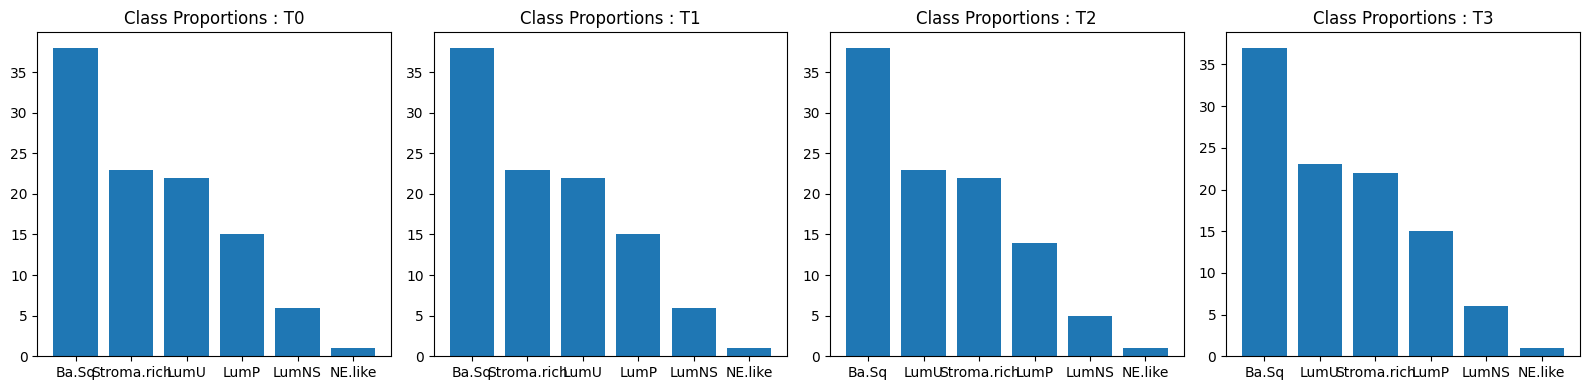

In [33]:
plot_fold_statistics(df)

In [35]:
check_overlap(df, 'patient_id')

No overlap between df1 and df2.
No overlap between df1 and df3.
No overlap between df1 and df4.
No overlap between df2 and df3.
No overlap between df2 and df4.
No overlap between df3 and df4.
